In [ ]:
# default_exp plotting

# Plotting

> Plots for GWP, GWP*, and IGWP

In [ ]:
#hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#export
from matplotlib import pyplot as plt

from igwp.core import get_emission_data_paths, calc_temp_increase, make_gwps, make_gwps_improved

In [ ]:
#export
def plot_one(ax, name, path, make_df, temp_increases):
    """Plot the results of one scenario."""
    start_year=1900
    end_year=2100
    df = make_df(path, start_year=start_year, end_year=end_year)
    ax1 = df.cumsum().plot(ax=ax, title=name, legend=None)
    ax1.set_ylim((0, 2000))
    ax1.set_xlim((1900, 2100))
    ax2 = ax1.twinx()
    ax2.set_ylim((0, 0.99))
    temp_diff = temp_increases[start_year:end_year]
    # set first year to 0K
    temp_diff -= temp_diff[start_year]
    temp_diff[start_year:end_year].plot(ax=ax2, color='black', style='--', 
                                             label='temperature increase [K]')
    return ax1, ax2

In [ ]:
#export

def plot_all(rcp_scenarios,  make_df=make_gwps):
    """Plot the results of all scenarios."""
    temperatures = calc_temp_increase()
    fig, subs = plt.subplots(2, 2)
    fig.set_size_inches(10, 5)
    subs_flat = subs.flat
    for name, path in rcp_scenarios.items():
        sub = next(subs_flat)
        ax1, ax2 = plot_one(sub, name, path, make_df=make_df, 
                            temp_increases=temperatures[name])
    ax1.legend(loc=(1.2, 0))
    ax2.legend(loc=(1.2, 0.6))
    fig.text(0.75, 0.5, 'temperature increase [K]', rotation='vertical')
    fig.text(-0.01, 0.25, 'Emissions [$GtCO_2e$ or $GtCO_2e*$ / year]', rotation='vertical')
    fig.tight_layout()

In [ ]:
rcp_scenarios = get_emission_data_paths()

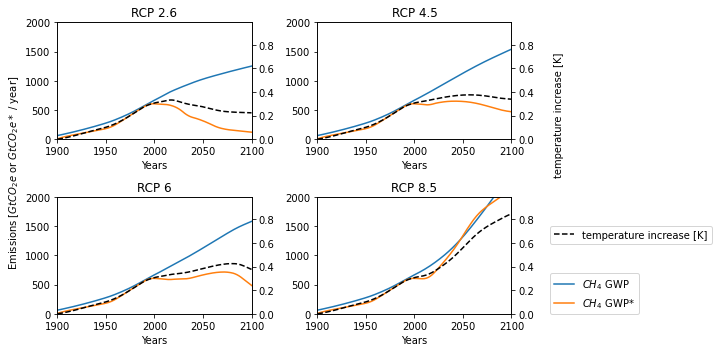

In [ ]:
plot_all(rcp_scenarios, make_df=make_gwps)

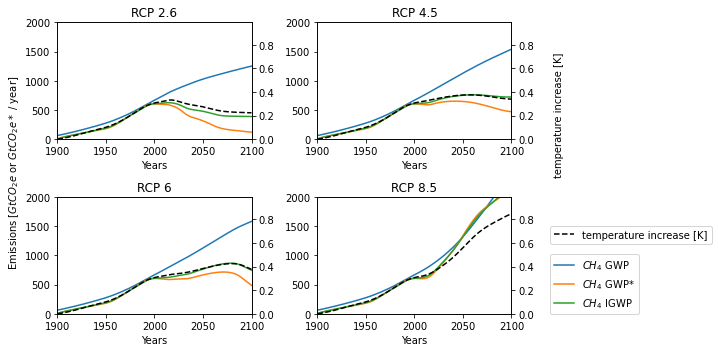

In [ ]:
plot_all(rcp_scenarios, make_df=make_gwps_improved)

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_plotting.ipynb.
Converted index.ipynb.
